In [1]:
import glob
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy
from IPython.display import display, Image
from tqdm import tqdm
import pandas as pd

In [2]:
targets = []
folder_path = "./files/*.pdf"     # 특정 폴더에 있는 모든 파일 목록
lists = glob.glob(folder_path)
print(lists)
for list in lists:
    targets.append(list.split('\\')[-1])
print(targets)

['./files\\hjhgjgilugjj.pdf', './files\\jhkjhjkhohoih.pdf', './files\\ljojiojkmnkjb.pdf']
['hjhgjgilugjj.pdf', 'jhkjhjkhohoih.pdf', 'ljojiojkmnkjb.pdf']


In [3]:
def draw_boxes(image, bounds, color='red', width=4):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

In [4]:
reader = easyocr.Reader(['ko', 'en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


  0%|                                           | 0/3 [00:00<?, ?it/s]

./files/hjhgjgilugjj.pdf



  0%|                                           | 0/1 [00:00<?, ?it/s]

[([[479, 378], [2452, 378], [2452, 552], [479, 552]], '2022년 1/4분기 노사협의회 협의 결과', 0.36595150169154894), ([[484, 671], [661, 671], [661, 780], [484, 780]], '1. 일', 0.7281676401198993), ([[718, 676], [816, 676], [816, 779], [718, 779]], '시', 0.9999222770534857), ([[876, 671], [1885, 671], [1885, 785], [876, 785]], '2022 3. 29(화), 15시 ~ 16시', 0.5882417251417167), ([[478, 853], [2032, 853], [2032, 978], [478, 978]], '2 장   소 : 예미지 3층 대회의실 및 화상회의', 0.6805954037500327), ([[483, 1031], [914, 1031], [914, 1156], [483, 1156]], '3. 참석 위원', 0.9455177242778301), ([[679, 1211], [3809, 1211], [3809, 1338], [679, 1338]], '근로자 위원 : 장병훈 책임매니저(대표위원) , 원진희 책임에지니어, 홍정수 책임매니저 (3명)', 0.5657672328055194), ([[674, 1338], [1109, 1338], [1109, 1461], [674, 1461]], '사용자 위원', 0.9998376558197287), ([[1167, 1334], [3732, 1334], [3732, 1472], [1167, 1472]], '김종배 책임매니저 (대표위원) 최구법 책임매니저, 이승환 책임매니저 (3명)', 0.3823337013230294), ([[686, 1508], [733, 1508], [733, 1551], [686, 1551]], '*', 0.8957241557713793), ([[737, 1472],

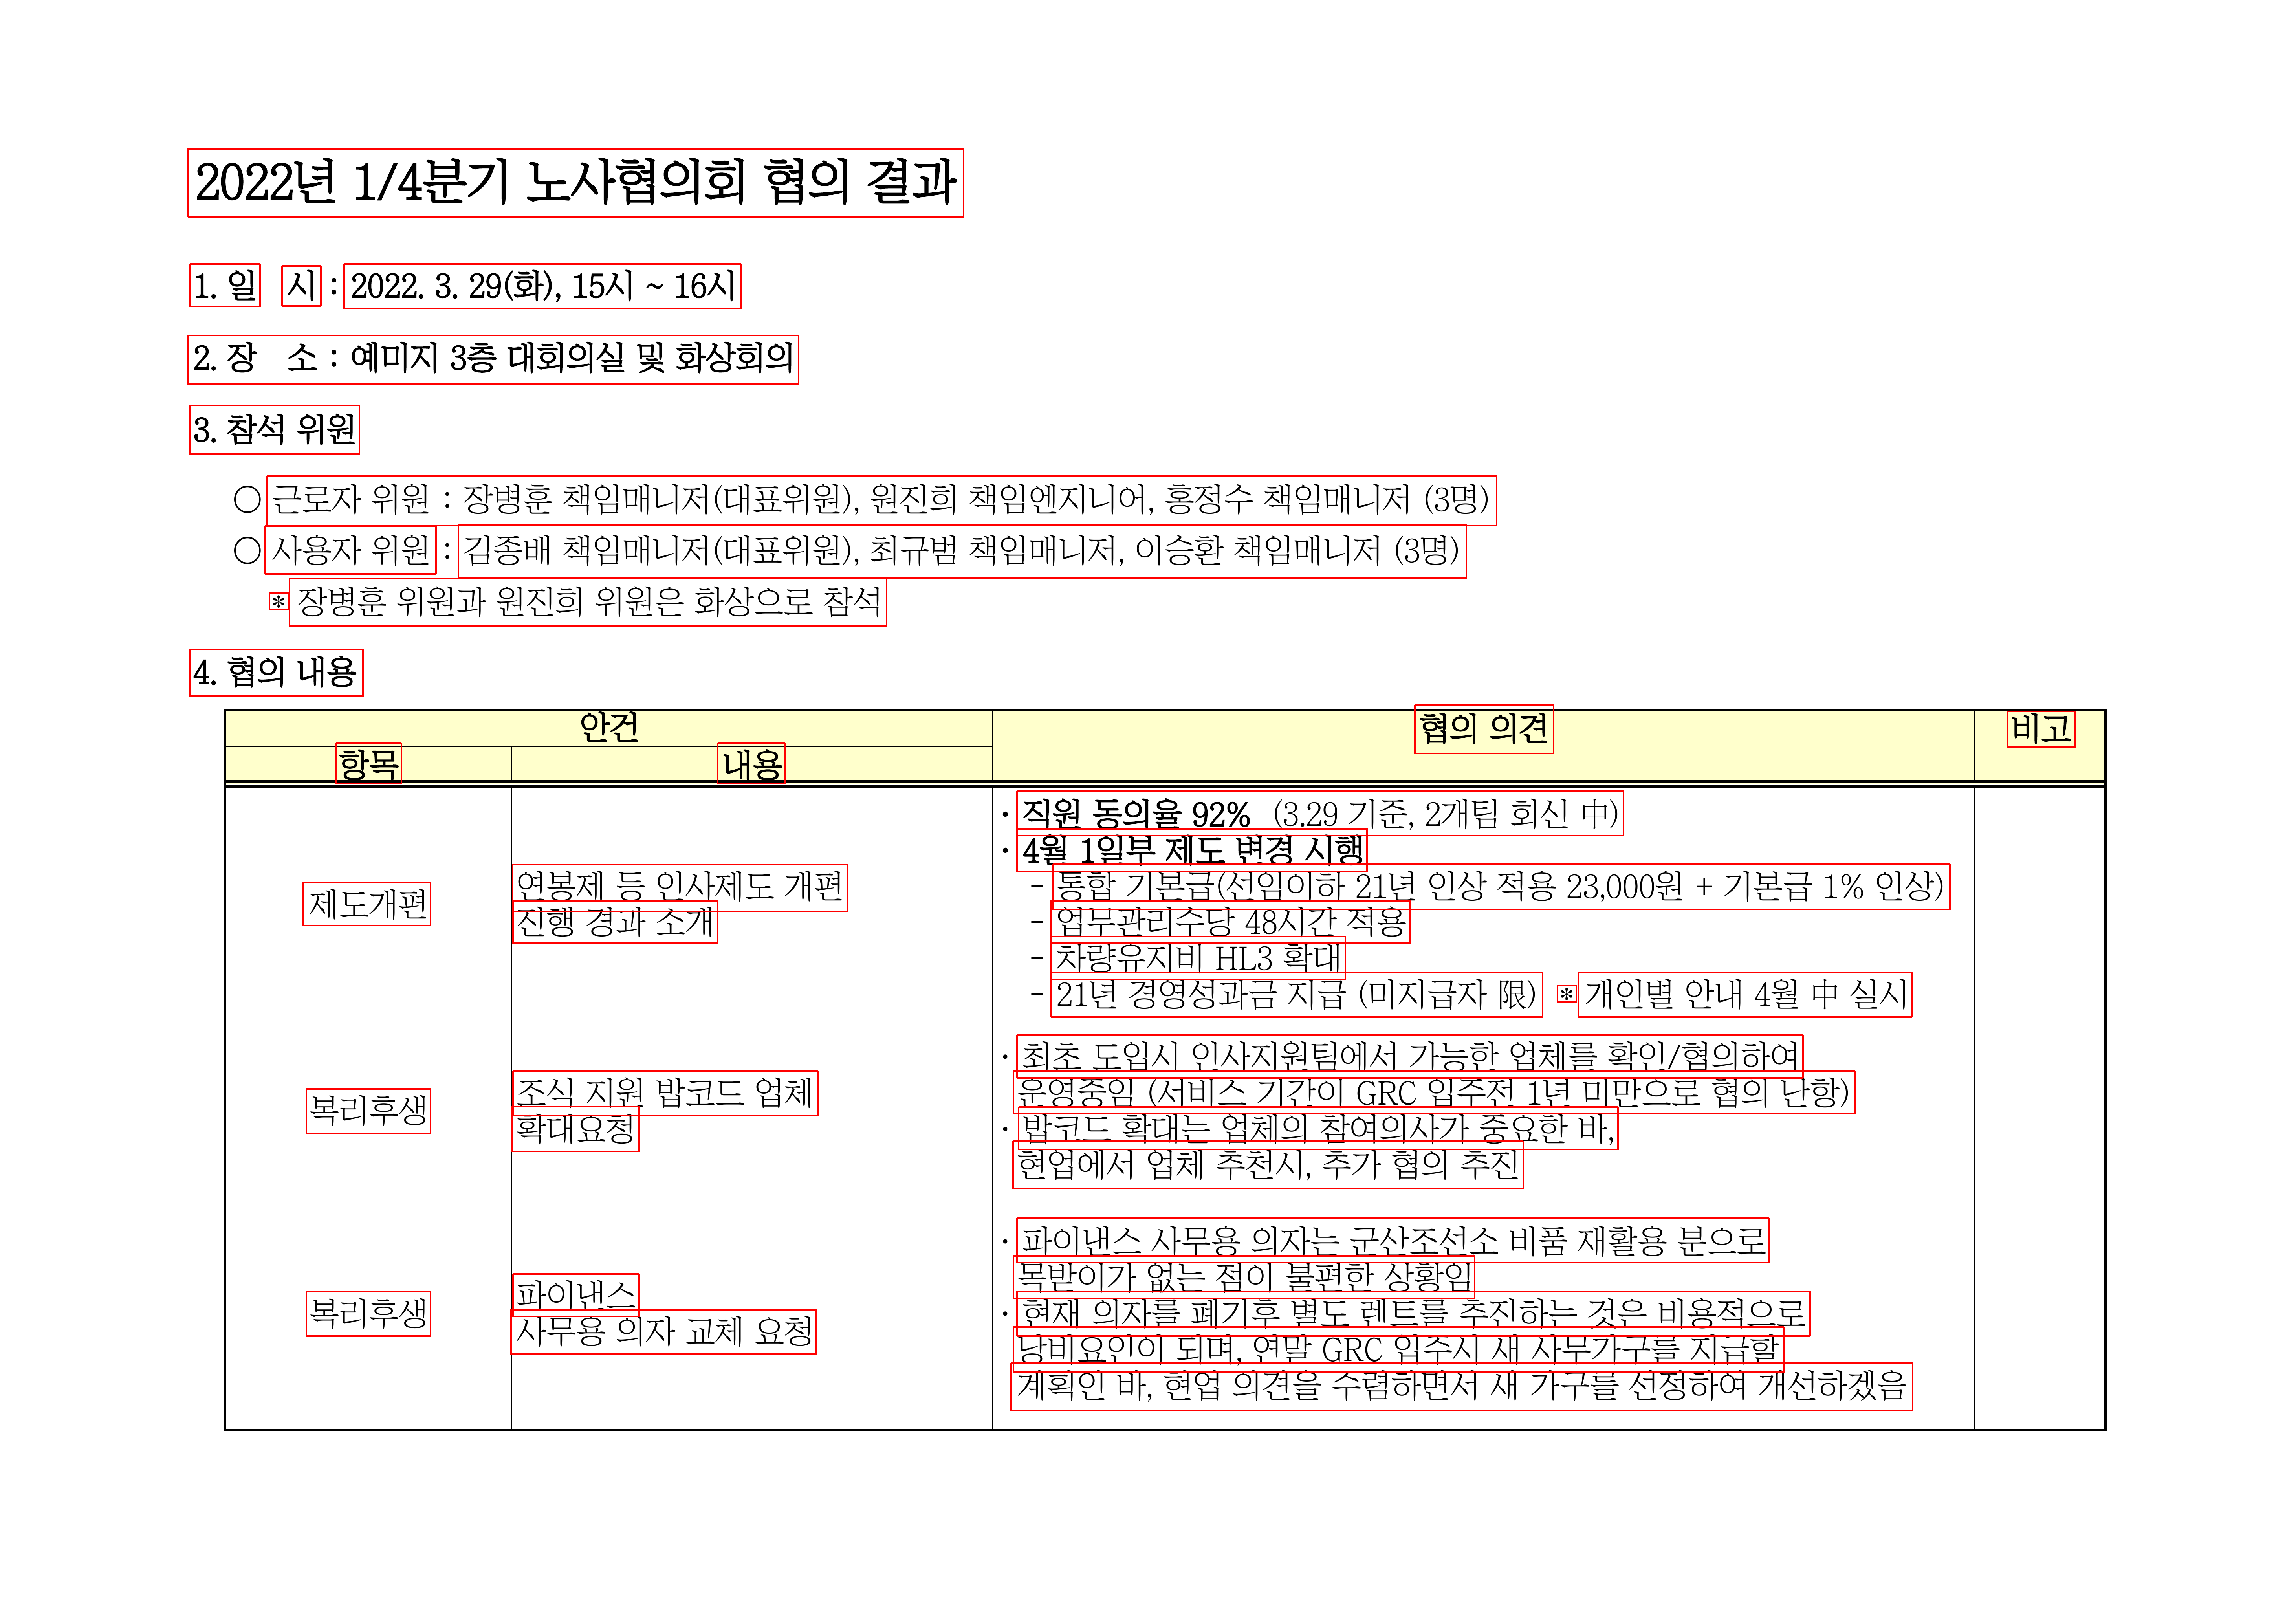


 33%|███████████▎                      | 1/3 [01:46<03:32, 106.15s/it]

['2022년 1/4분기 노사협의회 협의 결과', '1. 일', '시', '2022 3. 29(화), 15시 ~ 16시', '2 장   소 : 예미지 3층 대회의실 및 화상회의', '3. 참석 위원', '근로자 위원 : 장병훈 책임매니저(대표위원) , 원진희 책임에지니어, 홍정수 책임매니저 (3명)', '사용자 위원', '김종배 책임매니저 (대표위원) 최구법 책임매니저, 이승환 책임매니저 (3명)', '*', '장병훈 위원과 원진히 위원은 화상으로 참석', '4. 협의 내용', '협의 의견', '비고', '항복', '내용', '직원 동의울 929   (3.29 기준 27팀 회신 다)', '4월 1일부 제도 변경 시행', '제도개편', '연봉제 등 인사제도 개편', '통합 기본급(선임이하 21년 인상 적용 23,000원 + 기본급 1% 인상)', '진행 경과 소개', '업무관리수당 48시간 적용', '차량유지비 HL3 확대', '21년 경영성과금 지급 (미지급자 [R)', '*', '개인별 안내 4월 다 실시', '최초 도입시 인사지원팀에서 가능한 업체틀 확인 /협의하여', '복리후생', '조식 지원 밥코드 업체', '운영중임 (서비스 기간이 GRC 입주전 1년 미만으로 현의 난항)', '확대요청', '밥코드 확대는 업체의 참여의사가 중요한 바', '현업에서 업체 추천시 추가 현의 추진', '파이번스 사무용 의자능 군산조선소 비품 재활용 분으로', '파이번스', '목받이가 없는 점이 불편한 상황임', '복리후생', '사무용 의자 교체 요청', '현재 의자루 폐기후 별도 렌트틀 추진하는 것은 비용적으로', '낭비요인이 되며 연말 GRC 입주시 새 사무가구름 지급할', '계획인 바 현업 의견올 수렵하면서 새 가구흘 선정하여 개선하켓음', '']
['2022년 1/4분기 노사협의회 협의 결과', '1. 일', '시', '2022 3. 29(화), 15시 ~ 16시', '2 장   소 : 예미지 3층 대회의실 및 화상회의', '3. 참석 위원', '근로자 위원 : 장병


  0%|                                           | 0/1 [00:00<?, ?it/s]

[([[1770, 349], [2356, 349], [2356, 496], [1770, 496]], '전임 요청서', 0.9988461036755448), ([[394, 567], [1063, 567], [1063, 670], [394, 670]], '전임 대상자 인적사항', 0.8657677990350564), ([[1153, 710], [1346, 710], [1346, 802], [1153, 802]], '직 위', 0.9889253973960876), ([[1693, 705], [1885, 705], [1885, 797], [1693, 797]], '사 번', 0.8971832767153612), ([[2232, 701], [2424, 701], [2424, 793], [2232, 793]], '성 명', 0.7808917101903454), ([[2761, 691], [2964, 691], [2964, 789], [2761, 789]], '출신교', 0.9929156505932178), ([[3378, 704], [3581, 704], [3581, 803], [3378, 803]], '현직무', 0.5559917986822449), ([[503, 791], [775, 791], [775, 890], [503, 890]], '부 서 명', 0.8959448916097164), ([[1112, 859], [1395, 859], [1395, 972], [1112, 972]], '승급일자', 0.991392195224762), ([[1652, 855], [1935, 855], [1935, 967], [1652, 967]], '입사일자', 0.9995619654655457), ([[2191, 850], [2465, 850], [2465, 963], [2191, 963]], '생년월일', 0.9756818413734436), ([[2767, 856], [2963, 856], [2963, 948], [2767, 948]], '전 공', 0.9729142189025

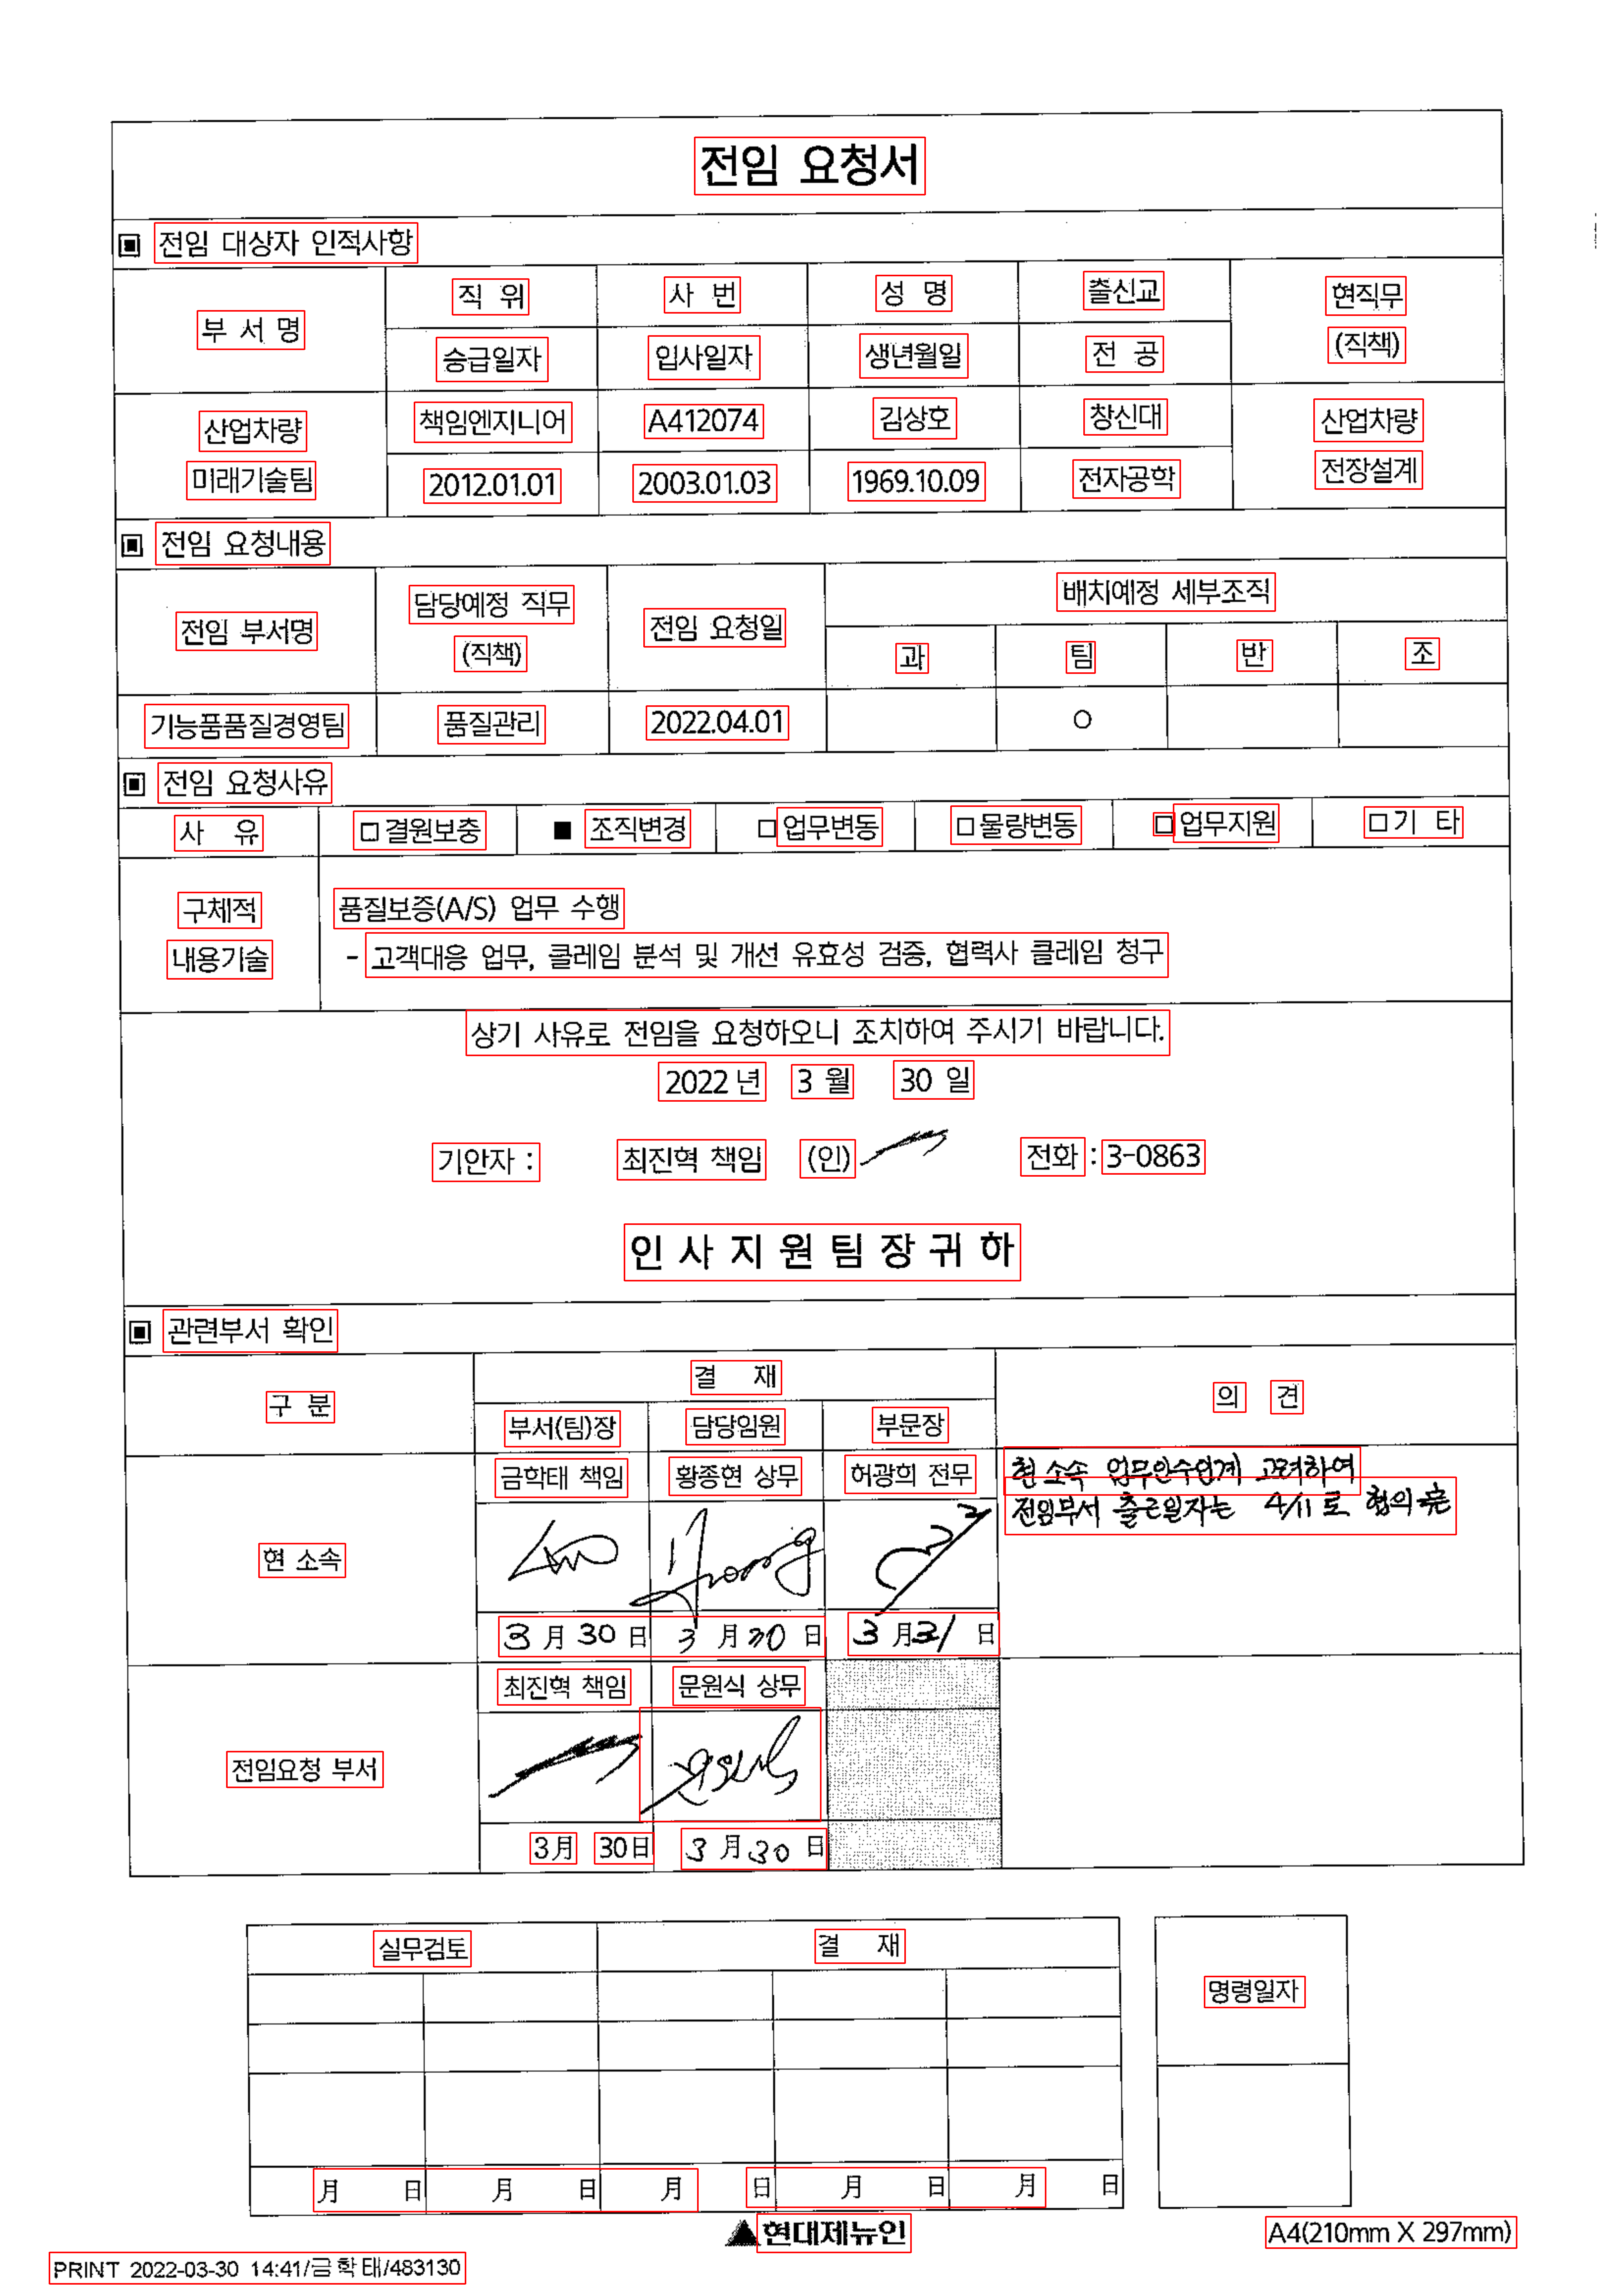


 67%|███████████████████████▎           | 2/3 [03:20<01:39, 99.32s/it]

['전임 요청서', '전임 대상자 인적사항', '직 위', '사 번', '성 명', '출신교', '현직무', '부 서 명', '승급일자', '입사일자', '생년월일', '전 공', '(직책)', '산업차량', '책임엔지니어', 'A412074', '김상호', '창신대', '산업차량', '미래기술림', '2012.01.01', '2003.01.03', '1969.10.09', '전자공학', '전장설계', '전임 요청내용', '담당예정 직무', '배치예정 세부조직', '전임 부서명', '전임 요청일', '(직책)', '과', '팀', '반', '조', '기능품품질경영팀', '품질관리', '2022.04.01', '전임 요청사유', '사   유', '다결원보충', '조직변경', '업무변동', '다물량변동', '[', '업무지원', '다기 타', '구체적', '품질보증(AS) 업무 수행', '내용기술', '고객대응 업무 몰레임 분석 및 개선 유요성 검종, 협력사 클레임 청구', '상기 사유로 전임올 요청하오니 조치하여 주시기 바람니다', '2022년', '3 월', '30 일', '기안자 :', '최진력 책임', '(인)', '전화', '3-0863', '인 사 지원 팀 장 귀 하', '관련부서 확인', '구 분', '결   재', '의', '견', '부서(팀)장', '담당임원', '부문장', '금학태 책임', '항종현 상무', '허광희 전무', '현소속 업무인수어계 펴하여', "전임부 출근일자는   4로' 현의뷰", '현 소속', '3 겹 30 미 3 타30 타', '3 ]리 E', '최진력 책임', '문원식 상무', '전임요청 부서', '1a둠b', '35', '30EL', '3 J 30 E', '실무검토', '결   재', '명령일자', '터   미   J   a   팀', '태   겨   태   겨', '현대제뉴인', 'A4(21Omm X 297mmn)', 'PRINT 2022-03-30 14:41/금 학태{483130', '']
['전임 요청서', '전임 대


  0%|                                           | 0/3 [00:00<?, ?it/s]

[([[1213, 665], [3030, 665], [3030, 881], [1213, 881]], '파이익 한국 발표자 서약서', 0.37980380566941235), ([[485, 1082], [1289, 1082], [1289, 1190], [485, 1190]], '파이혼 한국 행사 발표자', 0.3917556302122152), ([[2171, 1077], [3661, 1077], [3661, 1194], [2171, 1194]], '(성명) 논 파이큰 한국 행사름 진행하는 과정에', 0.1410754187217806), ([[489, 1219], [3420, 1219], [3420, 1328], [489, 1328]], '있어서 파이번 한국 행동강령올 준수하여 , 파이컨 한국 행동강령올 지키기 위한 파이익 한국', 0.12747832064091397), ([[488, 1346], [2765, 1346], [2765, 1470], [488, 1470]], '준비위원회의 가이드록 준수할 것올 서약하다 본 서약서클 제출합니다.', 0.2060126811502694), ([[490, 1594], [674, 1594], [674, 1692], [490, 1692]], 'CoC', 0.605043129905394), ([[485, 1765], [3562, 1765], [3562, 1878], [485, 1878]], '파이큰 한국은 다양한 사람들이 만나서 교류하는 곳입니다: 커유니티의 모든 참여자들이 신체적,', 0.3639579643920754), ([[493, 1898], [3751, 1898], [3751, 2011], [493, 2011]], '정신적 위협올 느끼지 양고 서로 존중받고 환영반는 경험올 하기 바람니다: 이틀 위해 발표자지 포함한', 0.4519632439489315), ([[489, 2036], [2978, 2036], [2978, 2148], [489, 2148]], '모든 참가자들은 파이컨 한국 행동규범(CoC)올 준수해야 합니다. 

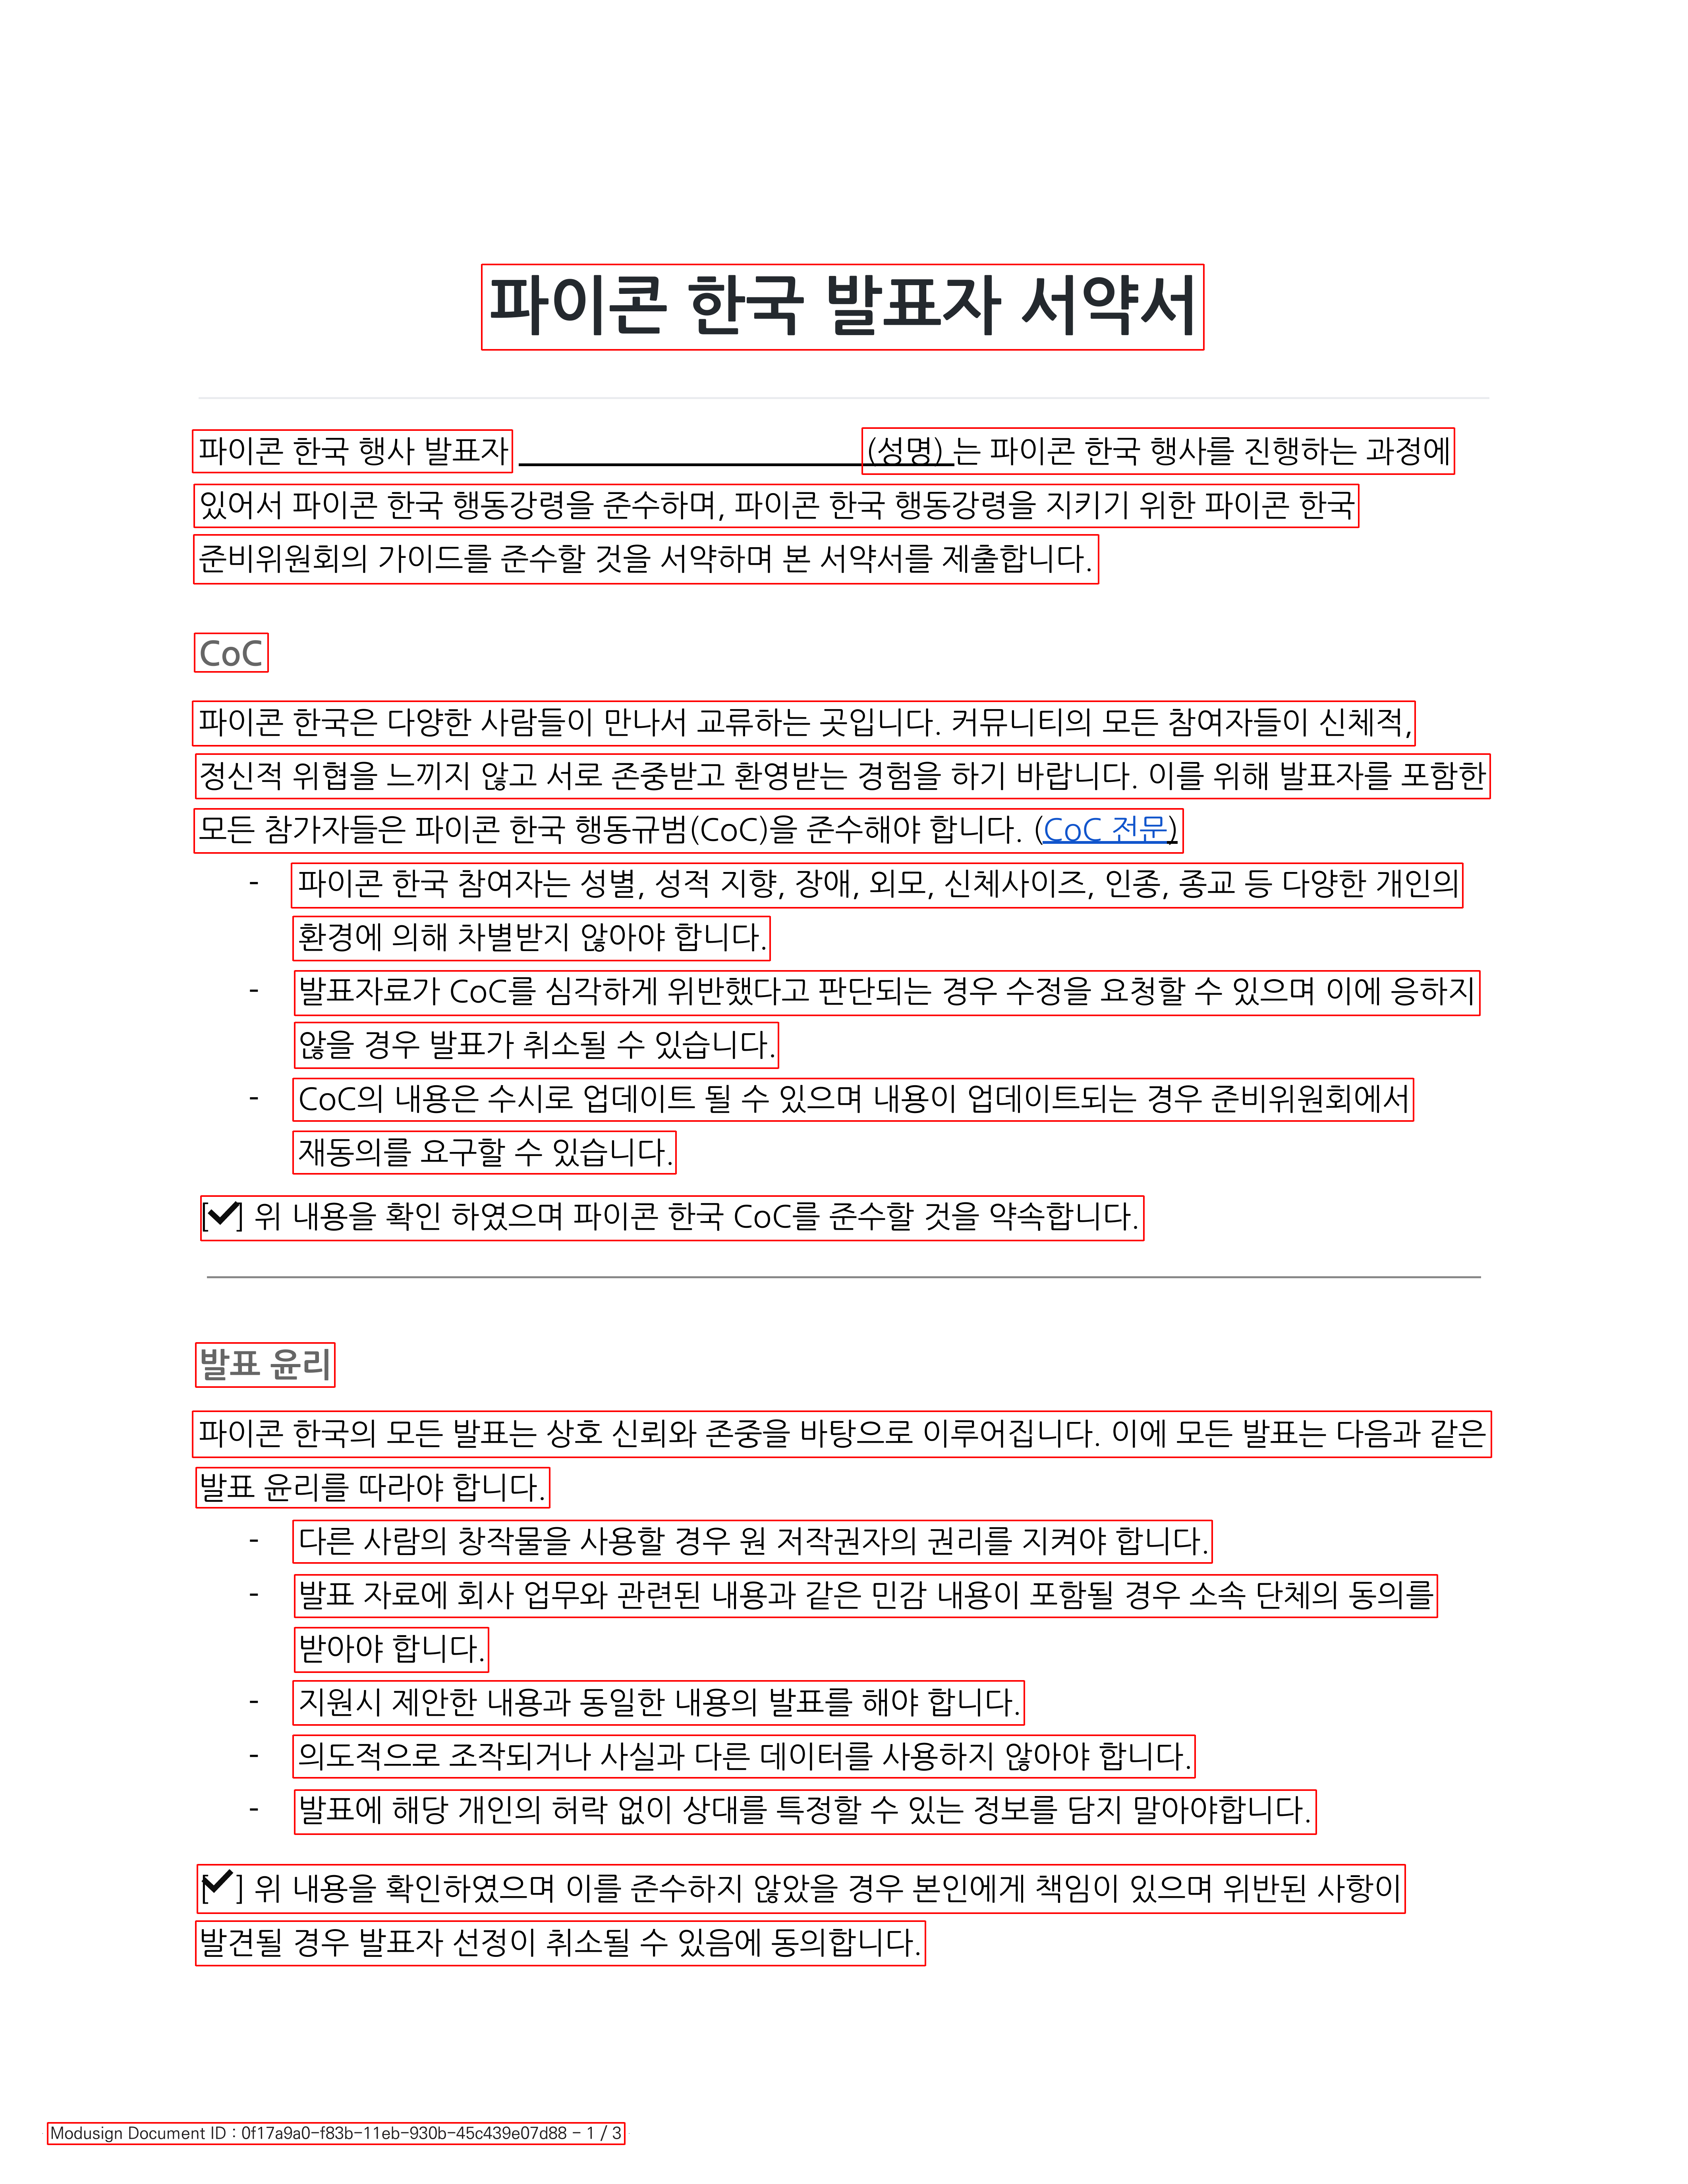


 33%|███████████▎                      | 1/3 [02:18<04:37, 138.73s/it]

['파이익 한국 발표자 서약서', '파이혼 한국 행사 발표자', '(성명) 논 파이큰 한국 행사름 진행하는 과정에', '있어서 파이번 한국 행동강령올 준수하여 , 파이컨 한국 행동강령올 지키기 위한 파이익 한국', '준비위원회의 가이드록 준수할 것올 서약하다 본 서약서클 제출합니다.', 'CoC', '파이큰 한국은 다양한 사람들이 만나서 교류하는 곳입니다: 커유니티의 모든 참여자들이 신체적,', '정신적 위협올 느끼지 양고 서로 존중받고 환영반는 경험올 하기 바람니다: 이틀 위해 발표자지 포함한', '모든 참가자들은 파이컨 한국 행동규범(CoC)올 준수해야 합니다. (CoC 전문)', '파이컨 한국 참여자는 성별, 성적 지향 , 장애, 외모 신체사이즈 인종, 종교 등 다양한 개인의', '환경에 의해 차별받지 않아야 합니다:', '발표자료가 Coc틀 심각하게 위반해다고 판단되는 경우 수정올 요청할 수 잇으며 이에 응하지', '않올 경우 발표가 취소월 수 있습니다.', 'CoC의 내용은 수시로 업데이트 월 수 있으며 내용이 업데이트되는 경우 준비위원회에서', '재동의틀 요구할 수 있습니다.', '[V] 위 내용올 확인 하여으여 파이본 한국 CoC틀 준수할 것올 약속합니다.', '발표 운리', '파이큰 한국의 모든 발표는 상호 신회와 존중올 바탕으로 이루어집니다: 이에 모든 발표는 다음과 같은', '발표 운리튼 따라야 합니다.', '다른 사람의 창작물올 사용할 경우 원 저작권자의 권리블 지켜야 합니다.', '발표 자료에 회사 업무와 관련된 내용과 같은 민감 내용이 포함월 경우 소속 단체의 동의틀', '받아야 합니다:', '지원시 제안한 내용과 동일한 내용의 발표틀 해야 합니다:', '의도적으로 조작되거나 사실과 다른 데이터들 사용하지 않아야 합니다.', '발표에 해당 개인의 허락 없이 상대클 특정할 수 잇는 정보들 담지 말아야합니다.', '[] 위 내용올 확인하엿으며 이틀 준수하지 않앗올 경우 본인에게 책임이 있으며 위반원 사항이', '발견월 경우 발표자 선정이 취

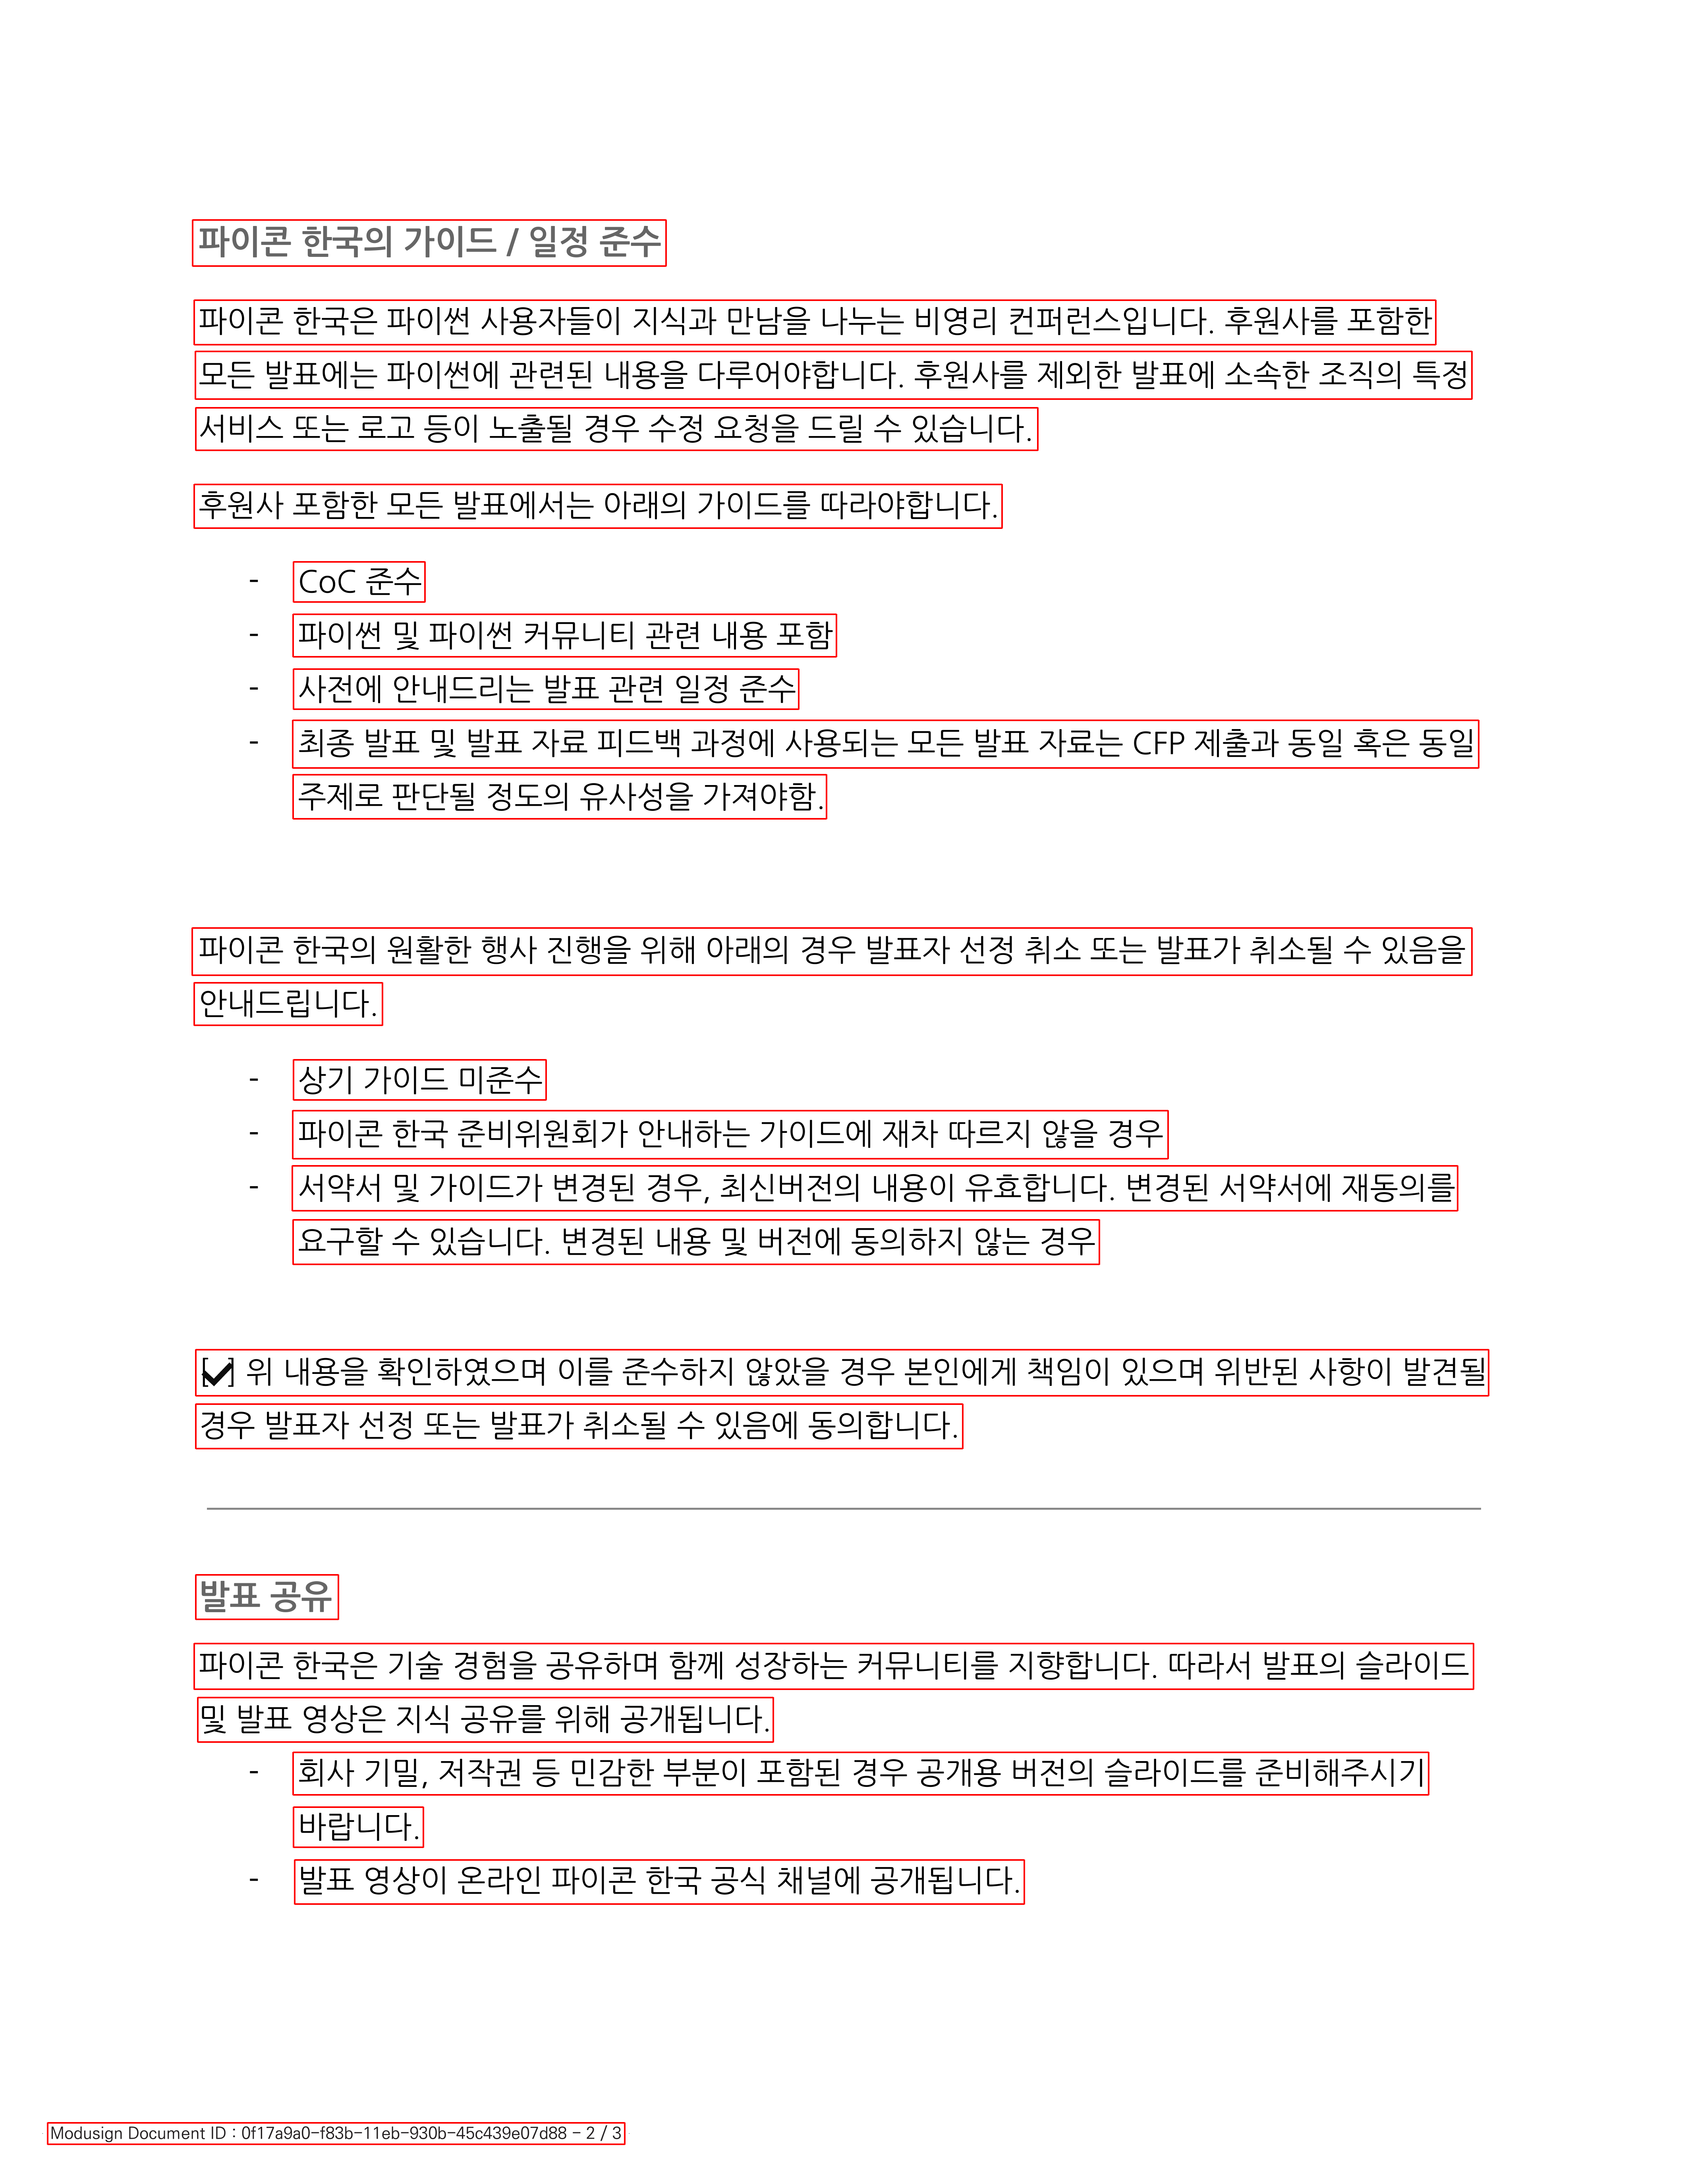


 67%|██████████████████████▋           | 2/3 [04:17<02:06, 126.73s/it]

['파이온 한국의 가이드 / 일정 준수', '파이컨 한국은 파이씬 사용자들이 지식과 만남을 나누는 비영리 권퍼런스입니다: 후원사흘 포함한', '모든 발표에는 파이센에 관련된 내용올 다루어야합니다. 후원사흘 제외한 발표에 소속한 조직의 특정', '서비스 또는 로고 등이 노출월 경우 수정 요청올 드럭 수 있습니다.', '후원사 포함한 모든 발표에서는 아래의 가이드틀 따라야합니다:', 'CoC 준수', '파이씬 및 파이씬 커유니티 관련 내용 포함', '사전에 안내드리는 발표 관련 일정 준수', '최종 발표 및 발표 자료 피드백 과정에 사용되논 모든 발표 자료는 CFP 제출과 동일 혹은 동일', '주제로 판단월 정도의 유사성올 가져야함.', '파이혼 한국의 원활한 행사 진행올 위해 아래의 경우 발표자 선정 취소 또는 발표가 취소되 수 있음올', '안내드립니다:', '상기 가이드 미준수', '파이큰 한국 준비위원회가 안내하는 가이드에 재차 따르지 않울 경우', '서약서 및 가이드가 변경된 경우 최신버전의 내용이 유호합니다: 변경된 서약서에 재동의틀', '요구할 수 있습니다: 변경된 내용 및 버전에 동의하지 안는 경우', '[위 내용올 확인하엿으며 이틀 준수하지 않앗올 경우 본인에계 책임이 있으며 위반된 사항이 발견돌', '경우 발표자 선정 또는 발표가 취소돌 수 있음에 동의합니다.', '발표 공유', '파이큰 한국은 기술 경험올 공유하여 함께 성장하는 커유니티틀 지향합니다. 따라서 발표의 쓸라이드', '및 발표 영상은 지식 공유v 위해 공개I니다.', '회사 기밀, 저작권 등 민감한 부분이 포함된 경우 공개용 버전의 슬라이드틀 준비해주시기', '바람니다.', '발표 영상이 온라인 파이컨 한국 공식 채널에 공개월니다.', 'Modusign Document ID : 0f17a9a0-f83b-71eb-9306-45c439e07d88 - 2 / 3', '']
['파이익 한국 발표자 서약서', '파이혼 한국 행사 발표자', '(성명) 논 파이큰 한국 행사름 진행하는 과정에', 

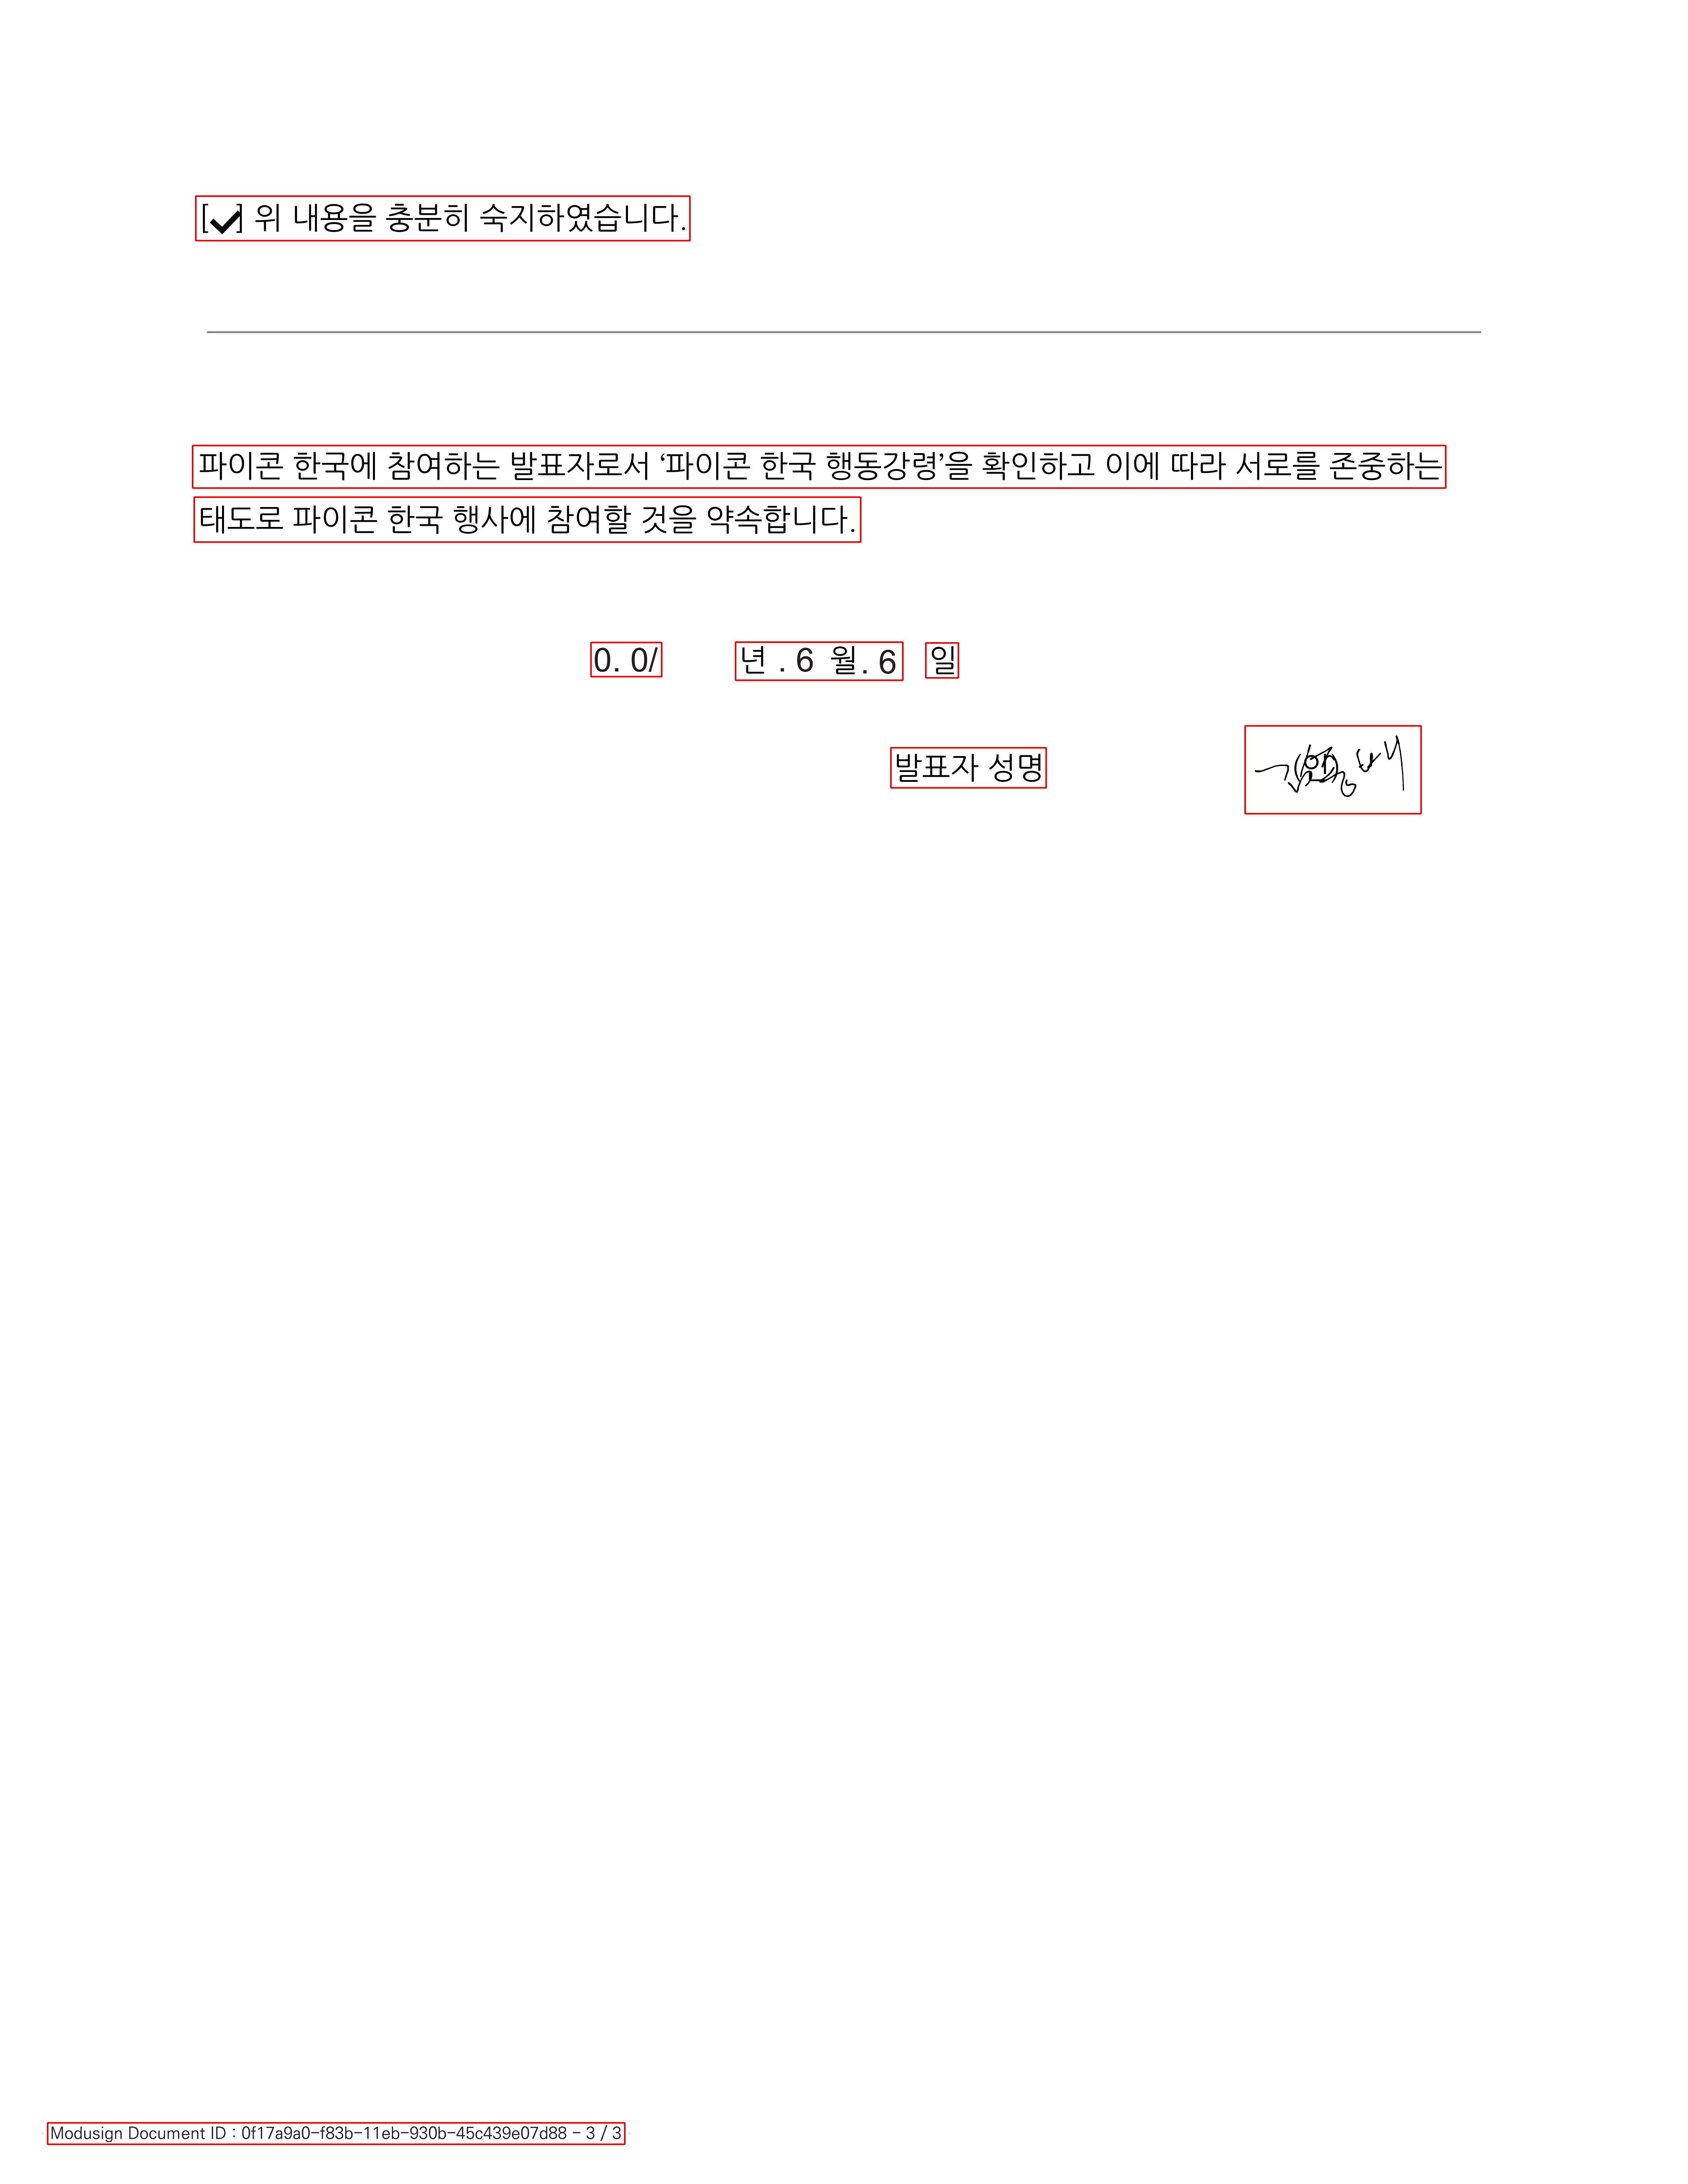


100%|██████████████████████████████████| 3/3 [08:45<00:00, 175.08s/it]

['[J]위 내용올 충분히 숙지하엿습니다.', "파이 한국에 참여하는 발표자로서 '파이컨 한국 행동강령올 확인하고 이에 따라 서로틀 존중하는", '태도로 파이컨 한국 행사에 참여할 것흘 약속합니다.', '0 이', '년 . 6 월. 6', '일', '발표자 성명', '기W ', 'Modusign Document ID : 0f17a9a0-f83b-71eb-9306-45c439e07d88 - 3 / 3', '']
['파이익 한국 발표자 서약서', '파이혼 한국 행사 발표자', '(성명) 논 파이큰 한국 행사름 진행하는 과정에', '있어서 파이번 한국 행동강령올 준수하여 , 파이컨 한국 행동강령올 지키기 위한 파이익 한국', '준비위원회의 가이드록 준수할 것올 서약하다 본 서약서클 제출합니다.', 'CoC', '파이큰 한국은 다양한 사람들이 만나서 교류하는 곳입니다: 커유니티의 모든 참여자들이 신체적,', '정신적 위협올 느끼지 양고 서로 존중받고 환영반는 경험올 하기 바람니다: 이틀 위해 발표자지 포함한', '모든 참가자들은 파이컨 한국 행동규범(CoC)올 준수해야 합니다. (CoC 전문)', '파이컨 한국 참여자는 성별, 성적 지향 , 장애, 외모 신체사이즈 인종, 종교 등 다양한 개인의', '환경에 의해 차별받지 않아야 합니다:', '발표자료가 Coc틀 심각하게 위반해다고 판단되는 경우 수정올 요청할 수 잇으며 이에 응하지', '않올 경우 발표가 취소월 수 있습니다.', 'CoC의 내용은 수시로 업데이트 월 수 있으며 내용이 업데이트되는 경우 준비위원회에서', '재동의틀 요구할 수 있습니다.', '[V] 위 내용올 확인 하여으여 파이본 한국 CoC틀 준수할 것올 약속합니다.', '발표 운리', '파이큰 한국의 모든 발표는 상호 신회와 존중올 바탕으로 이루어집니다: 이에 모든 발표는 다음과 같은', '발표 운리튼 따라야 합니다.', '다른 사람의 창작물올 사용할 경우 원 저작권자의 권리블 지켜야 합니다.', '발표 자료에 회사 업무와 관련된 내용과 같은 민감 내

In [5]:
total_lst = []
for target in tqdm(targets):
    target = f"./files/{target}"
    print(target)
    images = convert_from_path(target, 500, poppler_path=r'C:\Program Files\poppler-0.68.0\bin')
    lst = []
    for image in tqdm(images):
        bounds = reader.readtext(np.array(image), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch', beamWidth=100)
        print(bounds)
        draw_boxes(image, bounds)
        display(image)
        title = bounds[0][1]
        text="" 
        for i in range(len(bounds)):
            text = text + bounds[i][1] + '\n'
#         print(text)
        new_text =  text.split('\n')
        print(new_text)
        lst.extend(new_text)
        print(lst)
    total_lst.append(lst[0])

print(total_lst)

    


In [6]:
df = pd.DataFrame(total_lst)
df.to_excel("C:/my_develop2/pdf_ocr/results/test1.xlsx")

In [7]:
import os
import re

In [8]:
i = 0
path = "C:/my_develop2/pdf_ocr/files/"
for filename in os.listdir(path):
    my_source = path + filename
#     print(total_lst[i])
    new_name = total_lst[i].replace("/", "")
    my_dest = new_name + ".pdf"
    my_dest = path + my_dest
    os.rename(my_source, my_dest)
    i += 1